# Analisis Kandungan Nutrisi dalam Mi Instan di Indonesia

*Project* oleh **Denny Dewanta**
<br />Dataset oleh Denny Dewanta bersumber dari aplikasi Fat Secret

**Kunjungi penjelasan lengkap pada Medium saya:**
<br />https://medium.com/@dedewanta/analisis-kandungan-gizi-produk-mi-instan-di-indonesia-d1c864adea33

Jika terdapat hal yang ingin ditanyakan, dapat menghubungi saya pada:
<br />**LinkedIn:**
<br />https://www.linkedin.com/in/dedewanta/
<br />
<br />**E-mail:**
<br />dennydewanta@gmail.com

## Import Libraries & Settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
from wordcloud import WordCloud

In [2]:
# Color palette for data viz
colors = sns.color_palette("winter_r", 12)

## Import Dataset

In [3]:
df = pd.read_csv("nutrisi_miinstan.csv")
df.head()

,merk,merk_rasa,kemasan,sajian,berat,kalori,lemak_total,karbohidrat,protein,lemak_jenuh,lemak_trans,ltj_ganda,ltj_tunggal,kolesterol,serat,gula,sodium,kalium
0,Indomie,Indomie Goreng Original,bungkus,goreng,80,380,12.0,52.0,8.0,6.0,0,0,0,0,2,6.0,680,0
1,Indomie,Indomie Soto,bungkus,kuah,70,300,10.0,46.0,7.0,5.0,5,0,0,0,2,4.0,1470,0
2,Indomie,Indomie Ayam Bawang,bungkus,kuah,69,300,11.0,43.0,7.0,6.0,0,0,0,0,2,3.0,1330,0
3,Indomie,Indomie Kari Ayam,bungkus,kuah,72,320,12.0,46.0,7.0,5.0,0,0,0,0,2,4.0,1350,0
4,Indomie,Indomie Rendang,bungkus,goreng,91,420,16.0,59.0,9.0,8.0,0,0,0,0,3,9.0,1060,0


## Dataset Informations

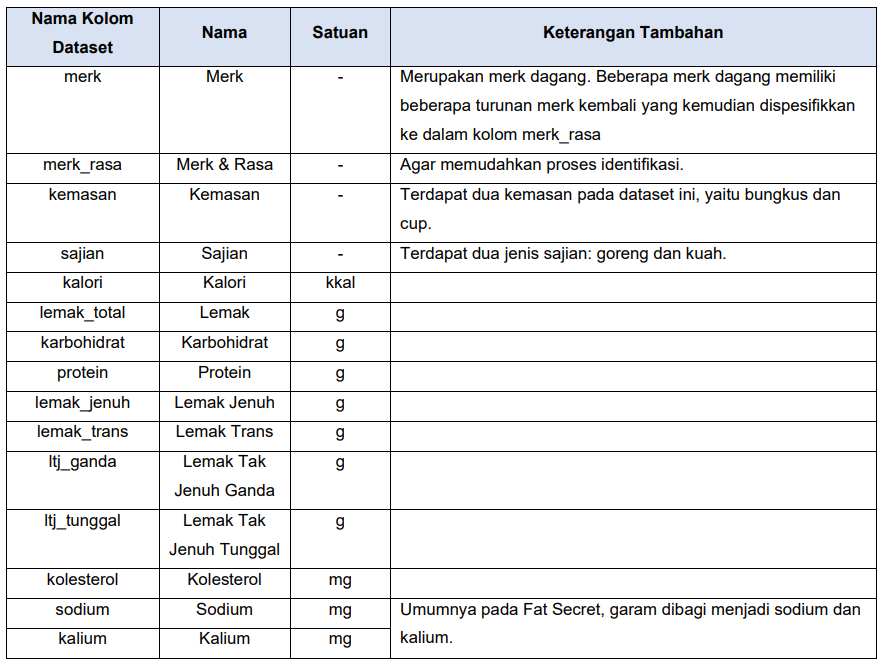

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   merk         126 non-null    object 
 1   merk_rasa    126 non-null    object 
 2   kemasan      126 non-null    object 
 3   sajian       126 non-null    object 
 4   berat        126 non-null    int64  
 5   kalori       126 non-null    int64  
 6   lemak_total  126 non-null    float64
 7   karbohidrat  126 non-null    float64
 8   protein      126 non-null    float64
 9   lemak_jenuh  126 non-null    float64
 10  lemak_trans  126 non-null    int64  
 11  ltj_ganda    126 non-null    int64  
 12  ltj_tunggal  126 non-null    int64  
 13  kolesterol   126 non-null    int64  
 14  serat        126 non-null    int64  
 15  gula         126 non-null    float64
 16  sodium       126 non-null    int64  
 17  kalium       126 non-null    int64  
dtypes: float64(5), int64(9), object(4)
memory usage: 1

In [5]:
print("Unique values di tiap-tiap variabel kategorikal:")
for col in df.select_dtypes(include=[object]):
    print(col,":", df[col].unique())

Unique values di tiap-tiap variabel kategorikal:
merk : ['Indomie' 'Sedaap' 'Sarimi' 'Gaga' 'Lemonilo' 'Richeese' 'Bihunku' 'ABC'
 "Sukses's" 'Nissin' 'Samyang' 'Pop Mie']
merk_rasa : ['Indomie Goreng Original' 'Indomie Soto' 'Indomie Ayam Bawang'
 'Indomie Kari Ayam' 'Indomie Rendang' 'Indomie Goreng Jumbo'
 'Indomie Aceh' 'Indomie Ayam Geprek' 'Indomie Kaldu Ayam'
 'Indomie Soto Spesial' 'Indomie Ayam Pop' 'Indomie Soto Banjar Limau'
 'Indomie Seblak Hot Jeletot' 'Indomie Soto Lamongan' 'Indomie Soto Medan'
 'Indomie Ayam Spesial' 'Indomie Ayam Panggang Jumbo'
 'Indomie Kriuk Pedas' 'Indomie Goreng Pedas' 'Indomie Mi Celor'
 'Indomie Mi Coto Makassar' 'Indomie Mi Kocok Bandung'
 'Indomie Sambal Rica-Rica' 'Indomie Empal Gentong'
 'Indomie Kebab Rendang' 'Indomie Mieghetti' 'Indomie Cabe Ijo'
 'Indomie Kuah Cakalang' 'Indomie Tom Yum' 'Indomie Kaldu Udang'
 'Indomie Sambal Matah' 'Indomie Cakalang' 'Indomie Tengkleng'
 'Sedaap Goreng Original' 'Sedaap Ayam Bawang' 'Sedaap Soto'
 'Seda

In [6]:
df.isna().sum()

merk           0
merk_rasa      0
kemasan        0
sajian         0
berat          0
kalori         0
lemak_total    0
karbohidrat    0
protein        0
lemak_jenuh    0
lemak_trans    0
ltj_ganda      0
ltj_tunggal    0
kolesterol     0
serat          0
gula           0
sodium         0
kalium         0
dtype: int64

## Descriptive Statistic Analysis

### Merk dengan produk mi instan terbanyak

<AxesSubplot:xlabel='count', ylabel='merk'>

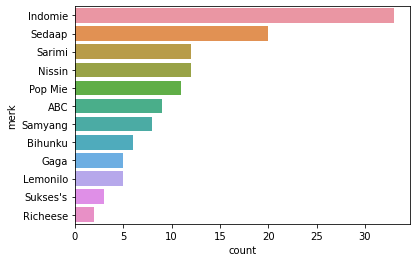

In [7]:
sns.countplot(y=df['merk'], data=df.kalori,
              order=df['merk'].value_counts().index)

### Penggunaan kata-kata dalam definisi varian rasa mi instan

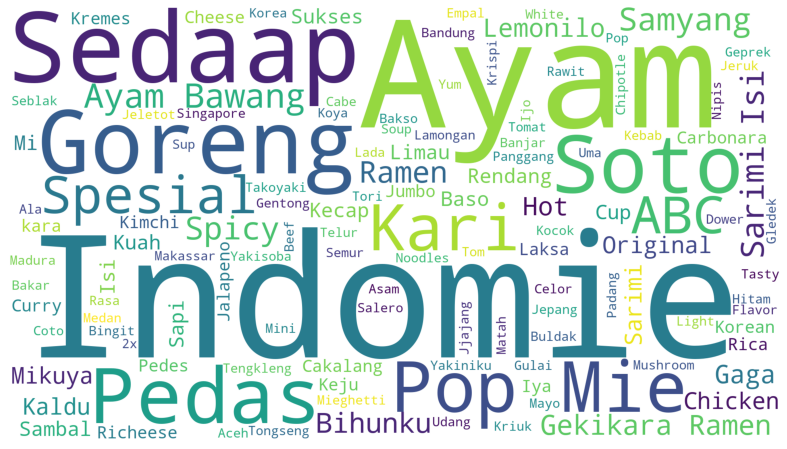

In [8]:
# Melihat penggunaan kata-kata dalam berbagai varian rasa mie instan.
plt.subplots(figsize=(25,8))
wordcloud = WordCloud(background_color='white',
                      width=1920,
                      height=1080).generate(" ".join(df.merk_rasa))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('merk_rasa.png')
plt.show()

Dari hasil wordcloud di atas, dapat dilihat bahwa banyak mie instan yang memiliki varian rasa ayam. Kemudian disusul dengan varian rasa soto yang juga cukup mendominasi. Lalu, sebagai pelengkap branding, digunakan pula kata-kata menggugah selera seperti spesial, hot, pedas, dan spicy. Hal ini menunjukkan bahwa memang terdapat varian rasa yang memang sebagai zona aman di mie instan dan terdapat branding menggunakan kata-kata tertentu untuk menarik calon pembeli.

### Rata-rata dan median kalori pada mi instan goreng dan kuah

In [9]:
np.round(df[['kalori', 'sajian']].groupby(['sajian'])['kalori'].mean(), 2)

sajian
goreng    407.92
kuah      373.36
Name: kalori, dtype: float64

In [10]:
np.round(df[['kalori', 'sajian']].groupby(['sajian'])['kalori'].median(), 2)

sajian
goreng    390.0
kuah      350.0
Name: kalori, dtype: float64

[Text(0.5, 1.0, 'Boxplot Mi Instan Goreng dan Kuah')]

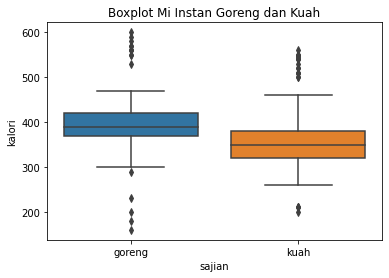

In [11]:
sns.boxplot(x='sajian', y='kalori', data=df).set(title='Boxplot Mi Instan Goreng dan Kuah')

### Rata-rata dan median kalori pada mi instan bungkus dan cup

In [12]:
np.round(df[['kalori', 'kemasan']].groupby(['kemasan'])['kalori'].mean(), 2)

kemasan
bungkus    396.44
cup        336.67
Name: kalori, dtype: float64

In [13]:
np.round(df[['kalori', 'kemasan']].groupby(['kemasan'])['kalori'].median(), 2)

kemasan
bungkus    380.0
cup        360.0
Name: kalori, dtype: float64

[Text(0.5, 1.0, 'Boxplot Mi Instan Bungkus dan Cup')]

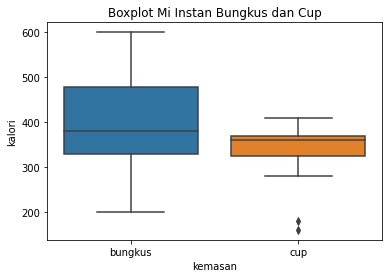

In [14]:
sns.boxplot(x='kemasan', y='kalori', data=df).set(title='Boxplot Mi Instan Bungkus dan Cup')

### Rata-rata dan kalori median tiap-tiap merk mi instan

In [15]:
np.round(df[['kalori', 'merk']].groupby(['merk'])['kalori'].mean(), 2)

merk
ABC         342.22
Bihunku     210.00
Gaga        360.00
Indomie     371.82
Lemonilo    298.00
Nissin      486.67
Pop Mie     320.91
Richeese    295.00
Samyang     503.12
Sarimi      475.00
Sedaap      380.50
Sukses's    560.00
Name: kalori, dtype: float64

In [16]:
np.round(df[['kalori', 'merk']].groupby(['merk'])['kalori'].median(), 2)

merk
ABC         320.0
Bihunku     210.0
Gaga        370.0
Indomie     360.0
Lemonilo    300.0
Nissin      500.0
Pop Mie     360.0
Richeese    295.0
Samyang     547.5
Sarimi      515.0
Sedaap      370.0
Sukses's    570.0
Name: kalori, dtype: float64

[Text(0.5, 1.0, 'Boxplot Kalori Merk Mi Instan')]

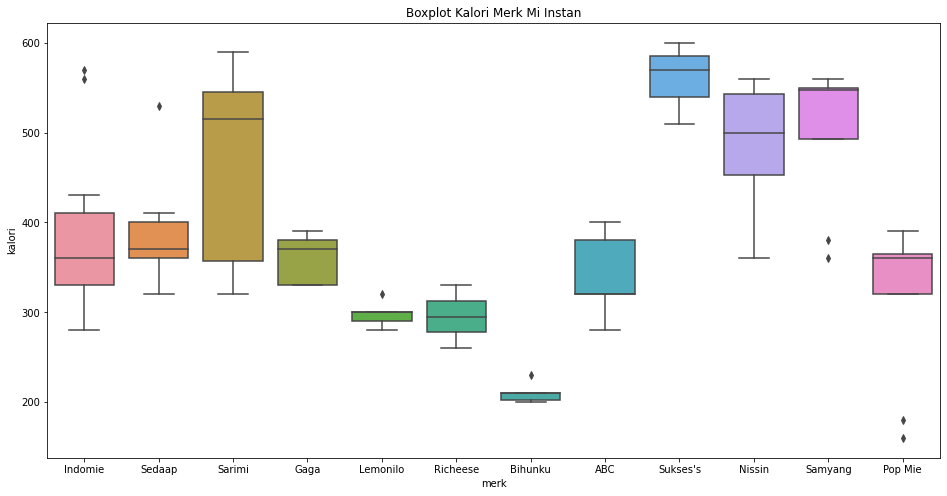

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='merk', y='kalori', data=df, ax=ax).set(title='Boxplot Kalori Merk Mi Instan')

### Boxplot Karbohidrat Setiap Merk Mi Instan

[Text(0.5, 1.0, 'Boxplot Karbohidrat Merk Mi Instan')]

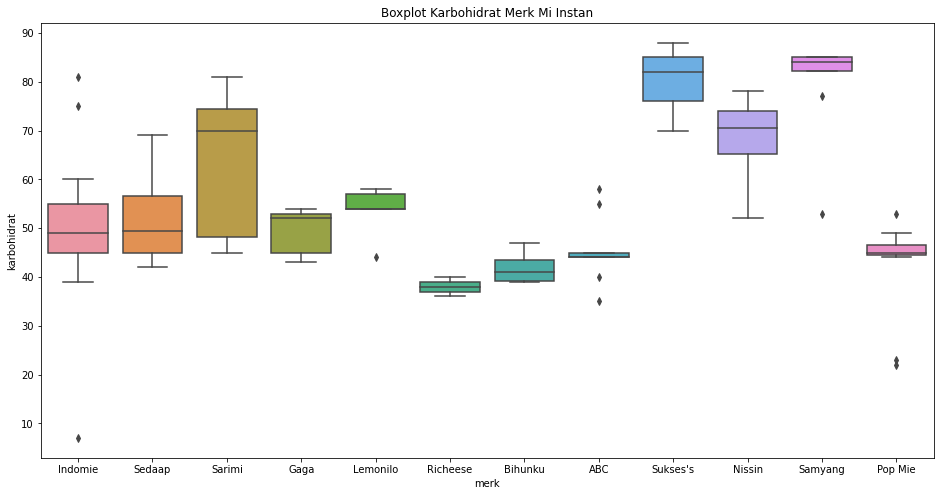

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='merk', y='karbohidrat', data=df, ax=ax).set(title='Boxplot Karbohidrat Merk Mi Instan')

### Boxplot Lemak Setiap Merk Mi Instan

[Text(0.5, 1.0, 'Boxplot Lemak Merk Mi Instan')]

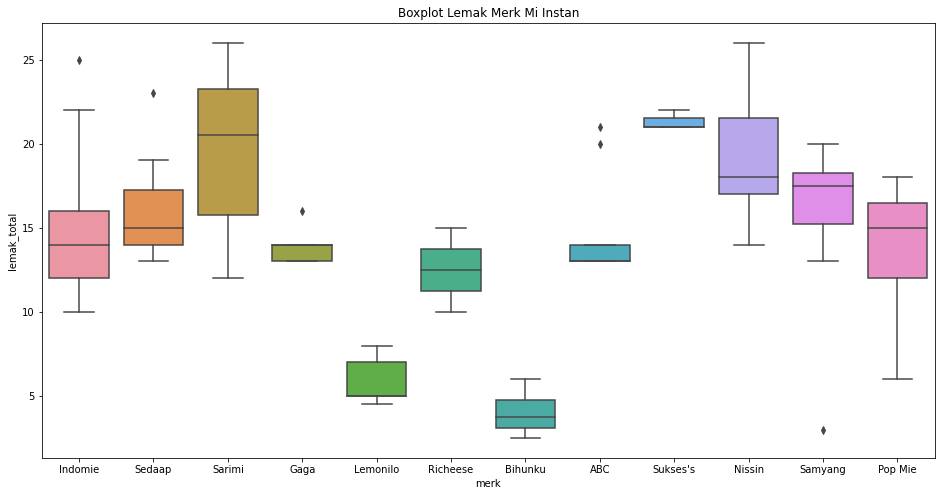

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='merk', y='lemak_total', data=df, ax=ax).set(title='Boxplot Lemak Merk Mi Instan')

### Boxplot Protein Setiap Merk Mi Instan

[Text(0.5, 1.0, 'Boxplot Protein Merk Mi Instan')]

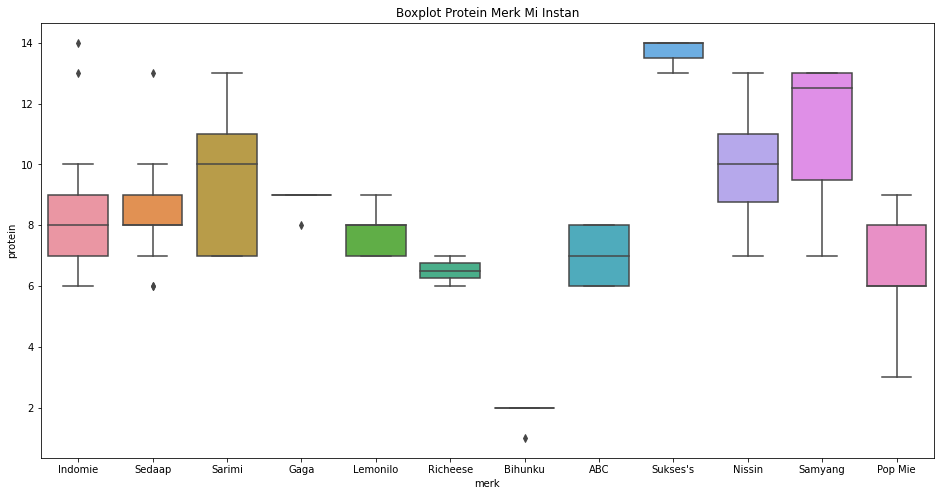

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='merk', y='protein', data=df, ax=ax).set(title='Boxplot Protein Merk Mi Instan')

## Analisis Variabel Kategorik (PMF)

### Proporsi mana yang lebih besar? Mi instan kuah atau goreng?

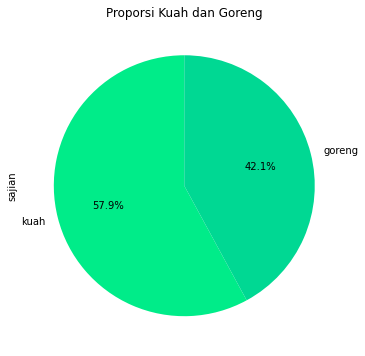

In [21]:
fig1 = df['sajian'].value_counts().plot(kind='pie', startangle=90, title='Proporsi Kuah dan Goreng',
                                        figsize=(6,6), autopct='%1.1f%%', colors=colors)

### Proporsi mana yang lebih besar? Mi instan bungkus atau cup?

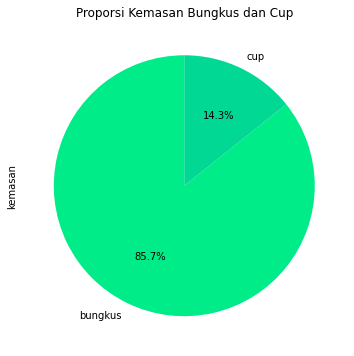

In [22]:
fig2 = df['kemasan'].value_counts().plot(kind='pie', startangle=90, title='Proporsi Kemasan Bungkus dan Cup',
                                         figsize=(6,6), autopct='%1.1f%%', colors=colors)

### Proporsi merk pada dataset

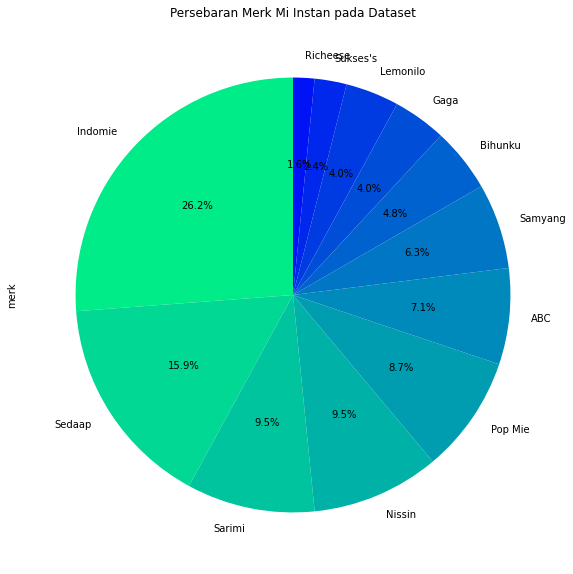

In [23]:
# Melihat persebaran merk pada dataset
fig3 = df['merk'].value_counts().plot(kind='pie', startangle=90, title='Persebaran Merk Mi Instan pada Dataset',
                                      figsize=(10,10), autopct='%1.1f%%', colors=colors)

### Bagaimana bentuk distribusi kalori pada kemasan bungkus dan cup?

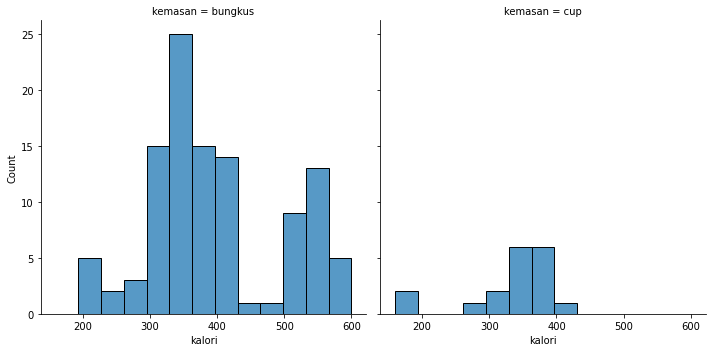

In [24]:
sns.displot(df, x='kalori', col='kemasan')

### Bagaimana bentuk distribusi kalori pada sajian kuah dan goreng?

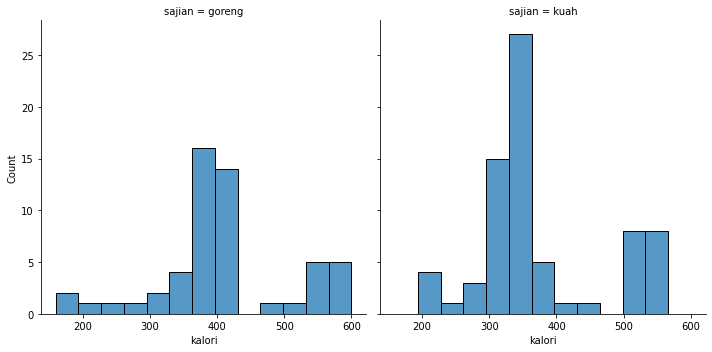

In [25]:
sns.displot(df, x='kalori', col='sajian')

### Bagaimana bentuk distribusi lemak pada kemasan bungkus dan cup?

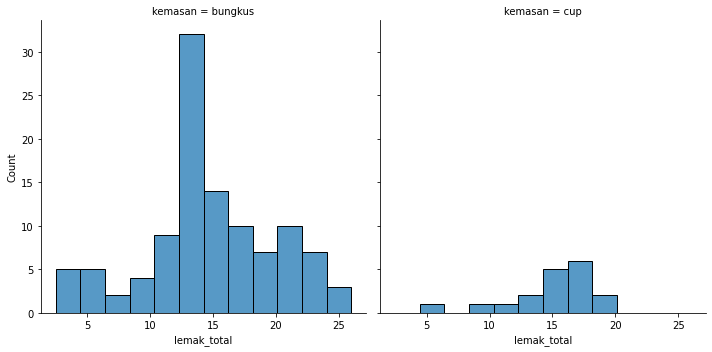

In [26]:
sns.displot(df, x='lemak_total', col='kemasan')

### Bagaimana bentuk distribusi lemak pada sajian kuah dan goreng?

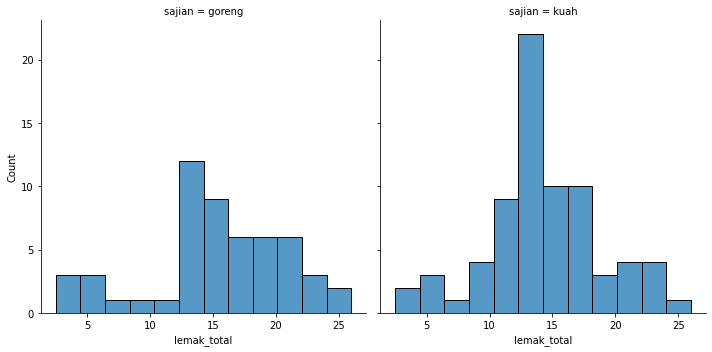

In [27]:
sns.displot(df, x='lemak_total', col='sajian')

### Bentuk distribusi protein pada kemasan bungkus dan cup?

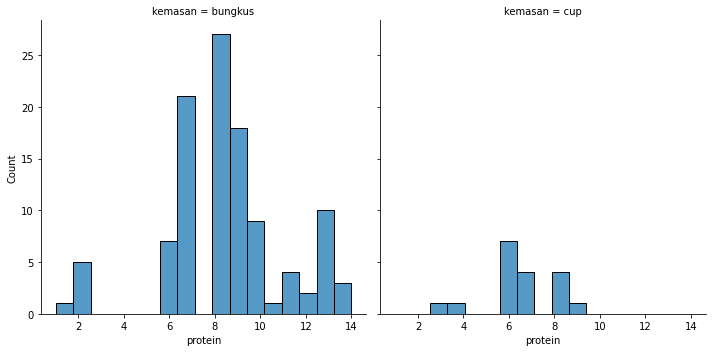

In [28]:
sns.displot(df, x='protein', col='kemasan')

### Bentuk distribusi protein pada sajian goreng dan kuah?

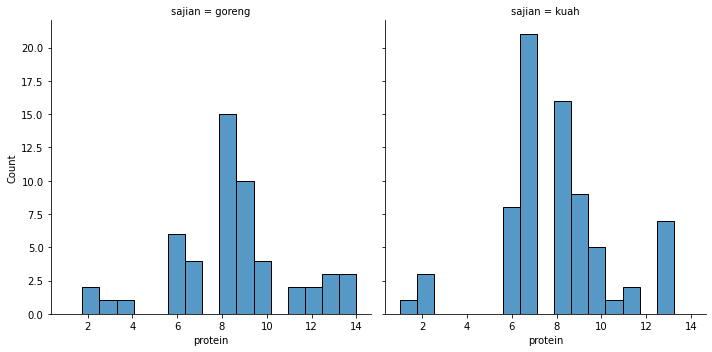

In [29]:
sns.displot(df, x='protein', col='sajian')

### Bentuk distribusi kandungan sodium dalam mi instan

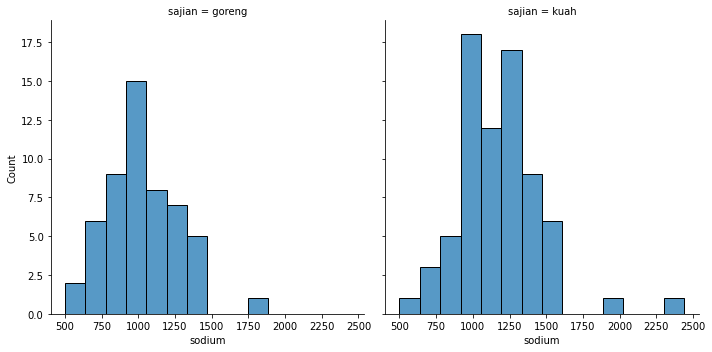

In [30]:
sns.displot(df, x='sodium', col='sajian')

## Analisis Korelasi Variabel

### Korelasi Feature pada Dataset

<AxesSubplot:title={'center':'Pearson Correlation pada Dataset'}>

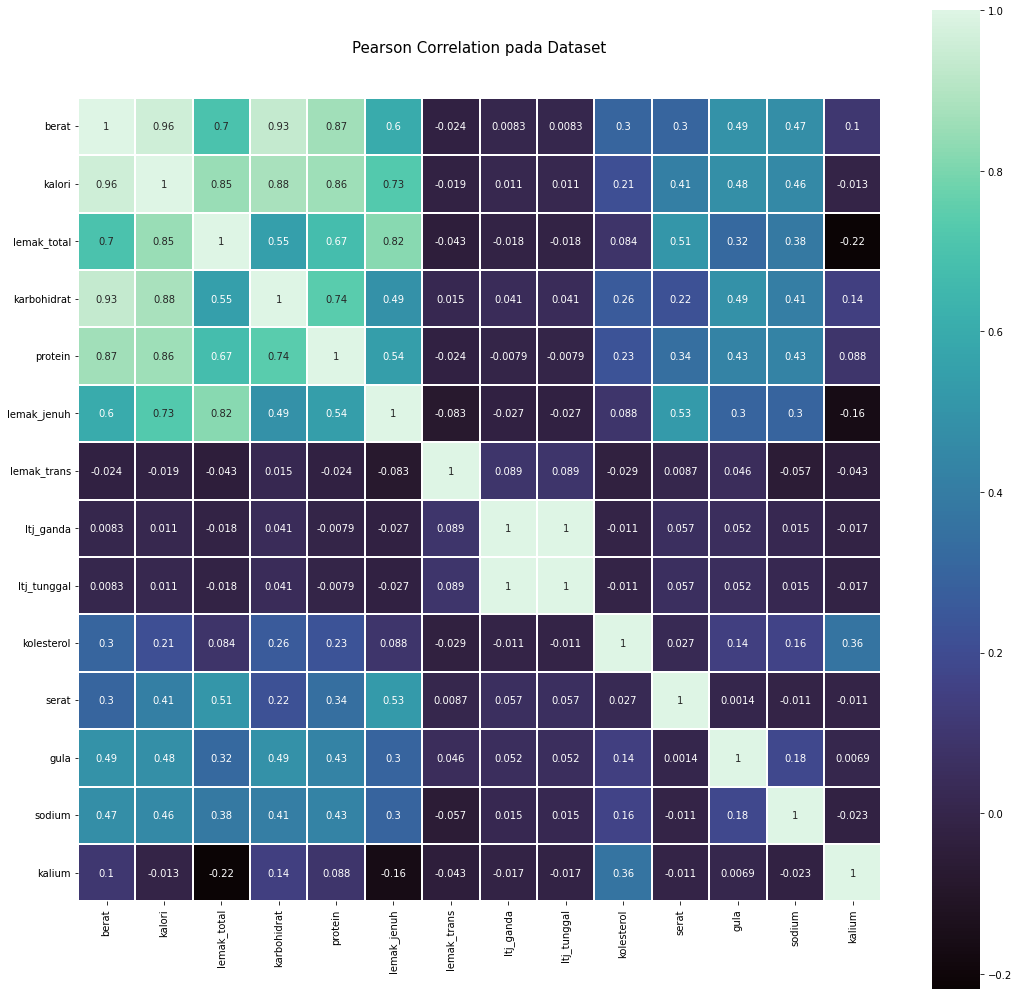

In [31]:
data_corr = df[['berat','kalori','lemak_total','karbohidrat','protein','lemak_jenuh','lemak_trans',
               'ltj_ganda','ltj_tunggal','kolesterol','serat','gula','sodium','kalium']].corr(method='pearson')
colormap = plt.cm.RdBu
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation pada Dataset', y=1.05, size=15)
sns.heatmap(data_corr,linewidths=0.1,vmax=1,
            square=True, cmap='mako', linecolor='white', annot=True)

In [32]:
def correlation(data1, data2):
    covariance = cov(data1, data2)
    corr, _ = pearsonr(data1, data2)
    print('Covariance: %.3f' % covariance[0,1])
    print('Pearsons correlation: %.3f' % corr)

### Korelasi Lemak dan Protein

Hal ini dilakukan karena dalam mengikuti program diet dibutuhkan kandungan lemak yang rendah dengan protein yang tinggi. Akan dilihat bagaimana korelasi protein dan lemak total pada mi instan.

Text(0.5, 1.05, 'Korelasi Kandungan Protein dan Lemak')

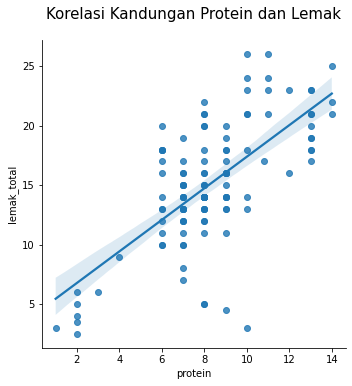

In [33]:
sns.lmplot(x="protein", y="lemak_total", data=df);
plt.title('Korelasi Kandungan Protein dan Lemak', y=1.05, size=15)

In [34]:
correlation(df['lemak_total'], df['protein'])

Covariance: 8.847
Pearsons correlation: 0.673


### Korelasi Karbohidrat dan Gula

Dilakukan analisis korelasi karbohidrat dan gula karena biasanya keduanya memiliki keterikatan.

Text(0.5, 1.05, 'Korelasi Kandungan Karbohidrat dan Gula')

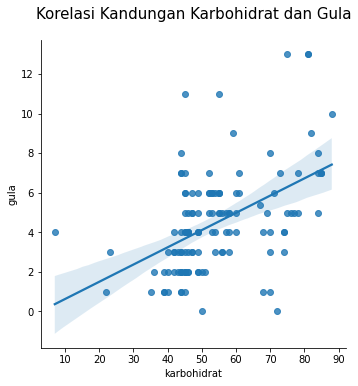

In [35]:
sns.lmplot(x="karbohidrat", y="gula", data=df);
plt.title('Korelasi Kandungan Karbohidrat dan Gula', y=1.05, size=15)

In [36]:
correlation(df['karbohidrat'], df['gula'])

Covariance: 18.379
Pearsons correlation: 0.491
